In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
tf.__version__

'2.1.0'

In [5]:
keras.__version__

'2.2.4-tf'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

In [11]:
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
X_test = X_test / 255.0

In [13]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00392157,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.17254902, 0.49803922, 0.71372549, 0.7254902 ,
        0.63137255, 0.47058824, 0.21568627, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.16470588,
        0.77647059, 0.98431373, 1.        , 0.98431373, 0.97647059,
        0.96862745, 1.    

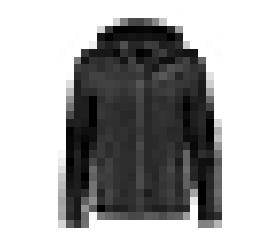

In [14]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [15]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [16]:
class_names = ["T-shit/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [17]:
class_names[y_train[0]]  # [4]

'Coat'

In [18]:
X_valid.shape

(5000, 28, 28)

In [19]:
X_test.shape

(10000, 28, 28)

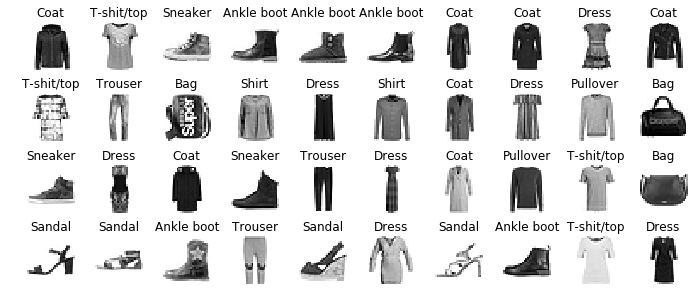

In [20]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [21]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))  # ==> 784
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [22]:
keras.backend.clear_session()

In [23]:
np.random.seed(42)
tf.random.set_seed(42)

In [24]:
model.layers

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [26]:
# ! conda install graphviz -y
# ! conda install pydot -y
# ! conda install python-graphviz -y

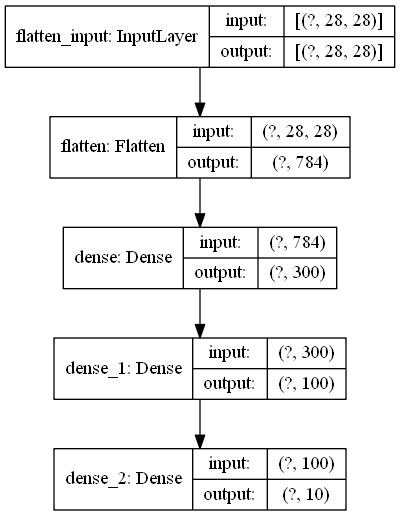

In [27]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [28]:
hidden1 = model.layers[1]

In [29]:
hidden1.name

'dense'

In [30]:
weights, biases = hidden1.get_weights()

In [31]:
weights

array([[-0.01397489, -0.03028006,  0.04932014, ...,  0.02342363,
         0.04014003,  0.04469003],
       [ 0.00076936,  0.03094768,  0.03143405, ..., -0.00898834,
         0.00220272,  0.00526213],
       [-0.046289  ,  0.00402282,  0.06527603, ..., -0.01496779,
         0.0047367 ,  0.05227314],
       ...,
       [ 0.0260378 , -0.0572606 ,  0.01740096, ...,  0.02616562,
        -0.02369206, -0.05463062],
       [-0.05866385, -0.07017576,  0.02803071, ..., -0.03586044,
         0.0202852 ,  0.01555745],
       [ 0.00287772, -0.03812415,  0.04198664, ..., -0.04804723,
         0.04346849,  0.05317207]], dtype=float32)

In [32]:
weights.shape

(784, 300)

In [33]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:
biases.shape

(300,)

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd", metrics=["accuracy"])

In [36]:
%%time
hist = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
# Epoch 30/30
# 55000/55000 [==============================] - 7s 135us/sample - loss: 0.2283 - accuracy: 0.9178 - val_loss: 0.2856 - val_accuracy: 0.8966
# Wall time: 3min 35s

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 3s 61us/sample - loss: 0.7118 - accuracy: 0.7657 - val_loss: 0.5110 - val_accuracy: 0.8308
Epoch 2/30
55000/55000 [==============================] - 3s 56us/sample - loss: 0.4873 - accuracy: 0.8297 - val_loss: 0.4656 - val_accuracy: 0.8408
Epoch 3/30
55000/55000 [==============================] - 3s 56us/sample - loss: 0.4440 - accuracy: 0.8455 - val_loss: 0.4379 - val_accuracy: 0.8518
Epoch 4/30
55000/55000 [==============================] - 3s 56us/sample - loss: 0.4153 - accuracy: 0.8540 - val_loss: 0.4127 - val_accuracy: 0.8592
Epoch 5/30
55000/55000 [==============================] - 3s 55us/sample - loss: 0.3955 - accuracy: 0.8607 - val_loss: 0.3889 - val_accuracy: 0.8638
Epoch 6/30
55000/55000 [==============================] - 3s 58us/sample - loss: 0.3801 - accuracy: 0.8666 - val_loss: 0.3808 - val_accuracy: 0.8698
Epoch 7/30
55000/55000 [==============================] -

In [37]:
hist.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}

In [38]:
print(hist.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [39]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

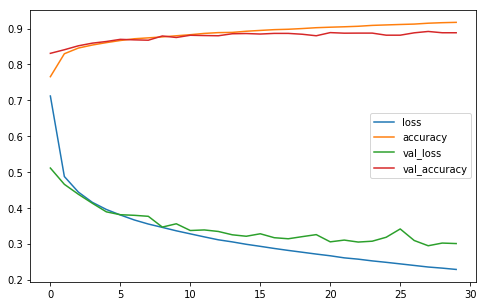

In [40]:
pd.DataFrame(hist.history).plot(figsize=(8,5))
plt.show()

In [41]:
model.evaluate(X_test, y_test)
# [0.32513083802461623, 0.8841], [loss, accuracy]

10000/10000 [==============================] - 0s 25us/sample - loss: 0.3387 - accuracy: 0.8809


[0.33870916414260865, 0.8809]

In [42]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

#        [0   , 1  ,  2  ,  3  ,  4  ,  5  ,  6  ,  7,    8  ,  9]
# array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
#        [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
#        [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
#       dtype=float32)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [43]:
y_pred = model.predict_classes(X_new)
y_pred
# array([9, 2, 1], dtype=int64)

array([9, 2, 1], dtype=int64)

In [44]:
np.array(class_names)[y_pred]
# array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U10')

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U10')

In [45]:
y_new = y_test[:3]
y_new
# array([9, 2, 1], dtype=uint8)

array([9, 2, 1], dtype=uint8)

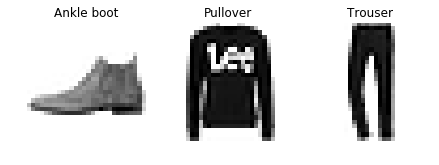

In [46]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index+1)
    plt.imshow(image, cmap='binary', interpolation="nearest")
    plt.axis("off")
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [47]:
# 회귀(regression)

In [48]:
# ! conda install scikit-learn==0.21.2 -y

In [49]:

from sklearn.datasets import fetch_california_housing

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
housing = fetch_california_housing()

In [53]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

In [54]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [55]:
scaler = StandardScaler()

In [56]:
X_train = scaler.fit_transform(X_train)

In [57]:
X_valid = scaler.transform(X_valid)

In [58]:
X_test = scaler.transform(X_test)

In [59]:
np.random.seed(42)

In [60]:
tf.random.set_seed(42)

In [61]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [62]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3)) # 0.001

In [63]:
%%time
hist = model.fit(X_train, y_train, epochs=50, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/50
11610/11610 [==============================] - 1s 46us/sample - loss: 1.6205 - val_loss: 2.0374
Epoch 2/50
11610/11610 [==============================] - 0s 24us/sample - loss: 0.7162 - val_loss: 0.6571
Epoch 3/50
11610/11610 [==============================] - 0s 24us/sample - loss: 0.6356 - val_loss: 0.5996
Epoch 4/50
11610/11610 [==============================] - 0s 24us/sample - loss: 0.5989 - val_loss: 0.5662
Epoch 5/50
11610/11610 [==============================] - 0s 24us/sample - loss: 0.5713 - val_loss: 0.5489
Epoch 6/50
11610/11610 [==============================] - 0s 24us/sample - loss: 0.5491 - val_loss: 0.5204
Epoch 7/50
11610/11610 [==============================] - 0s 24us/sample - loss: 0.5301 - val_loss: 0.5018
Epoch 8/50
11610/11610 [==============================] - 0s 26us/sample - loss: 0.5142 - val_loss: 0.4815
Epoch 9/50
11610/11610 [==============================] - 0s 25us/sample - loss: 0.5004 - val_l

In [64]:
mse_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 13us/sample - loss: 0.3821


In [65]:
X_new = X_test[:3]

In [66]:
X_new

array([[-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
         0.38899735,  0.19374821,  0.2870474 ],
       [-0.7125531 ,  0.10880952, -0.16332973,  0.20164652,  0.12842117,
        -0.11818174, -0.23725261,  0.06215231],
       [-0.2156101 ,  1.8491895 , -0.57982788,  0.18528489, -0.10429403,
        -0.67694905,  1.00890193, -1.4271529 ]])

In [67]:
y_pred = model.predict(X_new)

In [68]:
y_pred

array([[0.461476 ],
       [1.7974054],
       [3.459208 ]], dtype=float32)

In [69]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

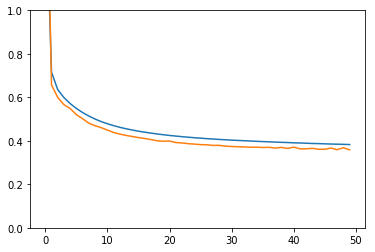

In [70]:
plt.plot(pd.DataFrame(hist.history))
plt.gca().set_ylim(0, 1)
plt.show()

In [71]:
# 함수형(functional) API

In [72]:
np.random.seed(42)
tf.random.set_seed(42)

In [73]:
keras.backend.clear_session()

In [74]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [75]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [76]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

In [77]:
%%time
hist = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 50us/sample - loss: 1.2390 - val_loss: 0.6566
Epoch 2/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.6312 - val_loss: 0.6734
Epoch 3/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5886 - val_loss: 0.5574
Epoch 4/20
11610/11610 [==============================] - 0s 28us/sample - loss: 0.5595 - val_loss: 0.5235
Epoch 5/20
11610/11610 [==============================] - 0s 30us/sample - loss: 0.5361 - val_loss: 0.5011
Epoch 6/20
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5178 - val_loss: 0.5065
Epoch 7/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.5016 - val_loss: 0.4699
Epoch 8/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4888 - val_loss: 0.4745
Epoch 9/20
11610/11610 [==============================] - 0s 29us/sample - loss: 0.4772 - val_l

In [78]:
mse_test = model.evaluate(X_test, y_test)

5160/5160 [==============================] - 0s 15us/sample - loss: 0.4042


In [79]:
y_pred = model.predict(X_new)

In [80]:
y_pred

array([[0.47253639],
       [1.8545786 ],
       [3.3418884 ]], dtype=float32)

## 모델의 저장과 복원

In [81]:
np.random.seed(42)
tf.random.set_seed(42)

In [94]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.utils import np_utils
from keras.datasets import mnist

model=keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=[8]).
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)
])

AttributeError: 'Dense' object has no attribute 'keras'

In [83]:
model.compile(loss='mse',optimizer=keras.optimizers.SGD(lr=1e-3))

In [84]:
%%time


UsageError: %%time is a cell magic, but the cell body is empty. Did you mean the line magic %time (single %)?


## call back

In [85]:
keras.backend.clear_session()

In [86]:
np.random.seed(42)

In [87]:
tf.random.set_seed(42)

In [88]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=[8]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)
])


In [89]:
model.compile(loss='mse',optimizer=keras.optimizers.SGD(lr=1e-3))

In [90]:
checkpoint_cb=keras.callbacks.ModelCheckpoint('my_keras_model.h5',save_best_only=True) 
# 가장 좋은 마지막 값을 저장


In [91]:
%%time
hist=model.fit(X_train,y_train,epochs=10,
              validation_data=(X_valid,y_valid),callbacks=[checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 61us/sample - loss: 1.8423 - val_loss: 5.2165
Epoch 2/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.6876 - val_loss: 0.7732
Epoch 3/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.5954 - val_loss: 0.5446
Epoch 4/10
11610/11610 [==============================] - 0s 26us/sample - loss: 0.5553 - val_loss: 0.5425
Epoch 5/10
11610/11610 [==============================] - 0s 26us/sample - loss: 0.5268 - val_loss: 0.5539
Epoch 6/10
11610/11610 [==============================] - 0s 28us/sample - loss: 0.5049 - val_loss: 0.4701
Epoch 7/10
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4852 - val_loss: 0.4562
Epoch 8/10
11610/11610 [==============================] - 0s 28us/sample - loss: 0.4706 - val_loss: 0.4452
Epoch 9/10
11610/11610 [==============================] - 0s 27us/sample - loss: 0.4576 - val_l

In [92]:
model=keras.models.load_model('my_keras_model.h5') #최상의 모델로 복원

In [93]:
mse_test=model.evaluate(X_test,y_test)

5160/5160 [==============================] - 0s 24us/sample - loss: 0.4376


## 얼리스텁핑

In [96]:
model.compile(loss='mse',optimizer=keras.optimizers.SGD(lr=0.001))

In [102]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True )

In [103]:
%%time
hist=model.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid),
              callbacks=[checkpoint_cb,early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 0s 27us/sample - loss: 0.3244 - val_loss: 0.3700
Epoch 2/100
11610/11610 [==============================] - 0s 27us/sample - loss: 0.3245 - val_loss: 0.3142
Epoch 3/100
11610/11610 [==============================] - 0s 27us/sample - loss: 0.3238 - val_loss: 0.3622
Epoch 4/100
11610/11610 [==============================] - 0s 29us/sample - loss: 0.3238 - val_loss: 0.3114
Epoch 5/100
11610/11610 [==============================] - 0s 27us/sample - loss: 0.3233 - val_loss: 0.3662
Epoch 6/100
11610/11610 [==============================] - 0s 27us/sample - loss: 0.3233 - val_loss: 0.3156
Epoch 7/100
11610/11610 [==============================] - 0s 26us/sample - loss: 0.3228 - val_loss: 0.3151
Epoch 8/100
11610/11610 [==============================] - 0s 28us/sample - loss: 0.3226 - val_loss: 0.3093
Epoch 9/100
11610/11610 [==============================] - 0s 28us/sample - loss: 0.322

## hyperparametic tuning - 교재 참고

In [107]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
#모델을 만들어서 리턴
